Rand Score: 0.9104250559284116


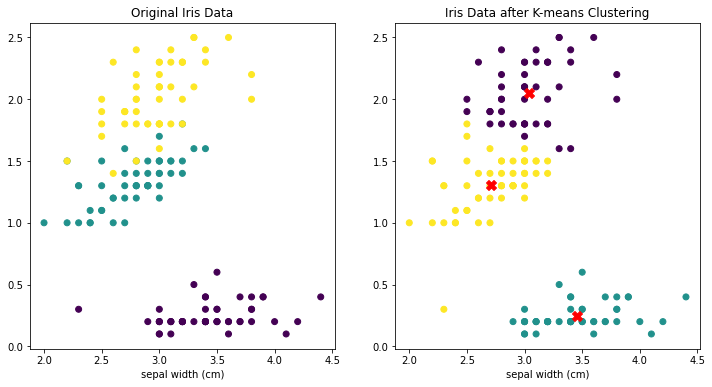

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.metrics import rand_score

# Load the data
iris = load_iris()
X = iris.data[:, [1, 3]]  # 1 and 3 are the features we will use here.

# npargmin Returns the indices of the minimum values along an axis.
# numpy.newaxis is used to increase the dimension of the existing array by one more dimension, when used once. 
# Thus, a 1D array will become a 2D array, a 2D array will become a 3D array and so on.
# K-means algorithm
# np.newaxis is used in NumPy to increase the dimensionality of an existing array by one more dimension when used within array indexing. 

def k_means(data, K, max_iters=100):
    centroids = data[np.random.choice(data.shape[0], K, replace=False)]
    for i in range(max_iters):
        clusters = np.argmin(np.sqrt(((data - centroids[:, np.newaxis])**2).sum(axis=2)), axis=0)
        new_centroids = np.array([data[clusters == k].mean(axis=0) for k in range(K)])
        if np.all(centroids == new_centroids):
            break
        centroids = new_centroids
    return clusters, centroids

# Using K-means to cluster the Iris data
K = 3  # As there are 3 species in the Iris dataset
clusters, centroids = k_means(X, K)


score = rand_score(iris.target, clusters)
print(f"Rand Score: {score}")
# Plot everything
plt.figure(figsize=(12, 6))

# Plot the original data
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=iris.target.astype(float))
plt.xlabel(iris.feature_names[1], fontsize=10)
plt.title('Original Iris Data')

# Plot the clustered data
plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=clusters.astype(float))
plt.scatter(centroids[:, 0], centroids[:, 1], s=100, c='red', marker='X')  # Marking the centroids
plt.xlabel(iris.feature_names[1], fontsize=10)
plt.title('Iris Data after K-means Clustering')

plt.show()


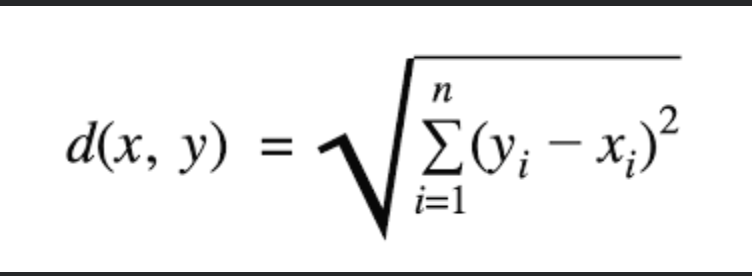